# thomson sampling

In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# importing libraries

dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

In [3]:
# Implementing Thompson Sampling

import random
N = 500
d = 10
ads_selected = []
number_of_reward_1 = [0] * d       # a list of size 10
number_of_reward_0 = [0] * d
total_reward = 0
for n in range(N):
    ad = 0
    max_random = 0
    for i in range(d):
        random_beta = random.betavariate(number_of_reward_1[i] + 1, number_of_reward_0[i] + 1)
        if max_random < random_beta:
            max_random = random_beta
            ad = i
    ads_selected.append(ad)
    reward = dataset.values[n, ad]
    if reward == 1:
        number_of_reward_1[ad] = number_of_reward_1[ad] + 1
    else:
        number_of_reward_0[ad] = number_of_reward_0[ad] + 1
    
    total_reward += reward

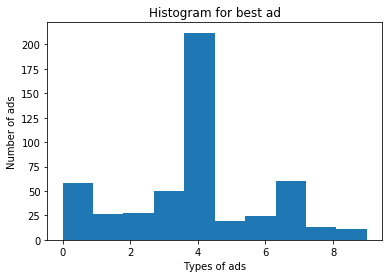

In [4]:
# Visualising the results - Histogram

plt.hist(ads_selected)
plt.title('Histogram for best ad')
plt.xlabel('Types of ads')
plt.ylabel('Number of ads')
plt.show()